# Import necessary modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import string

from HDVecSym import MAP #contains functions for MAP VSAs framework
from HDVecSym import DS  #contains functions for representing data structures with VSAs

# Basic set up 

In [2]:
N=1000 # dimensionality of HD vectors
concepts=list(string.ascii_lowercase) # create the alphabet of lowercase letters
itemMemory=MAP.item(concepts,  N=N) # create item memory for letters
print("Size of the item memory:",  itemMemory[0].shape)
print("Content of the item memory:")
print(itemMemory)

Size of the item memory: (1000, 26)
Content of the item memory:
[array([[-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ..., -1, -1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1, -1, -1]]), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']]


# Sets 

Similarity of the set to the codebook:


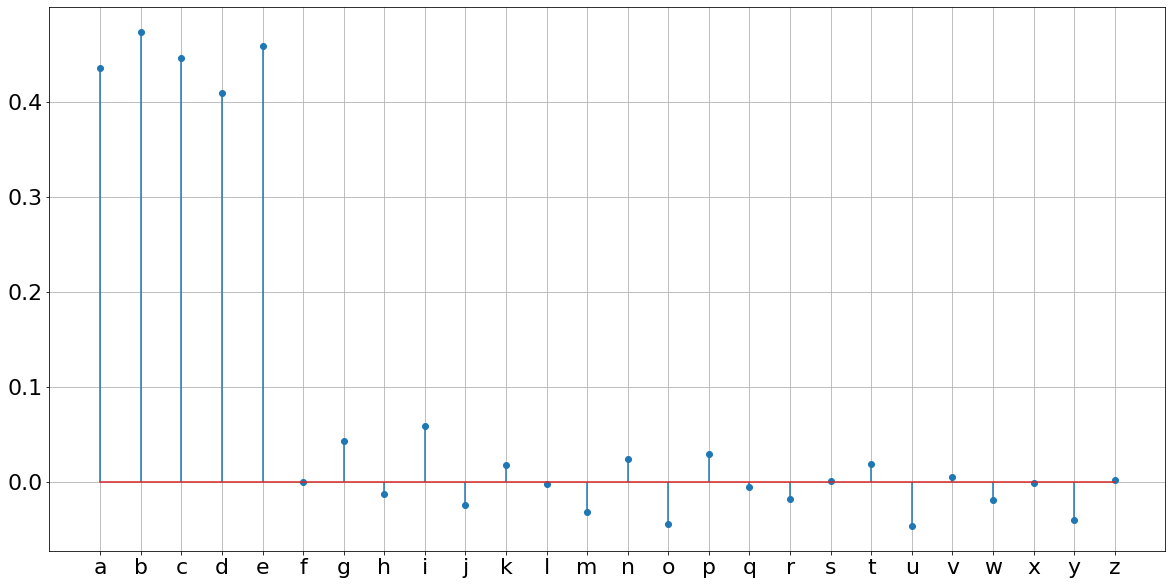

In [3]:
exSet=['a', 'b', 'c', 'd', 'e'] # set to represent
HDset=DS.sethd(itemMemory, exSet, vsatype="MAP", bundlingtype="unrestricted") # make representation

#Calculate cosine similarity between the representation of the set and the whole codebook
similarity=MAP.similarity(itemMemory[0],HDset,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the set to the codebook:")
plt.show()


# Sequences 

# Bundling-based representation

Similarity of the fifth position in the sequence to the codebook:


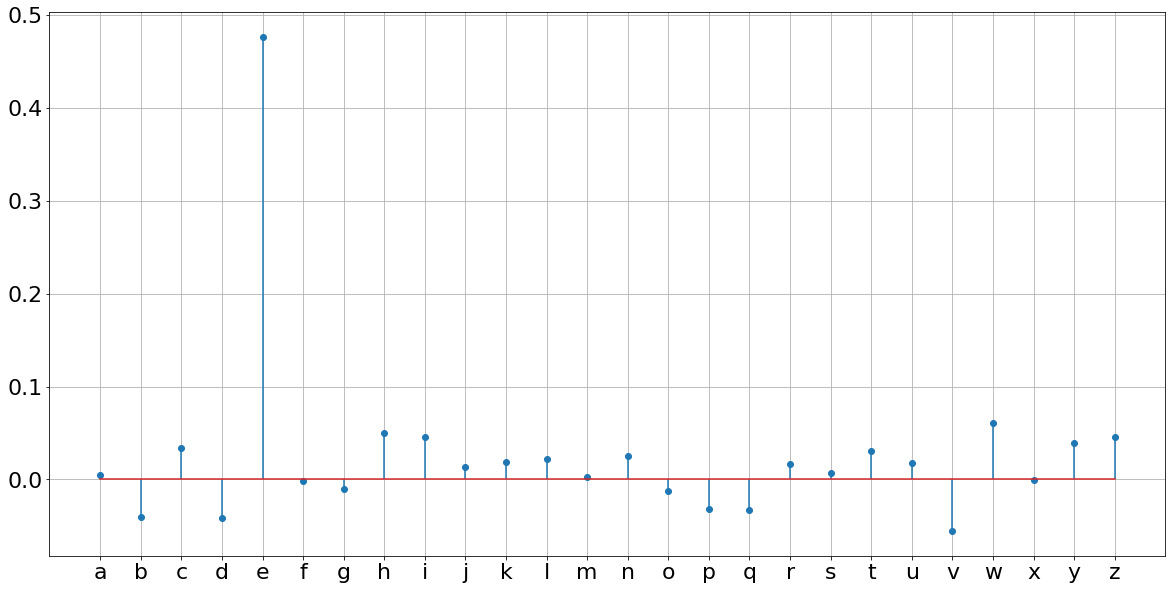

Cosine similarity between replaced sequence and the sequence represented from the scratch: [[1.]]


In [4]:
exSeq=['a', 'b', 'c', 'd', 'e'] # sequence to represent

#
HDseq_bundling=DS.sequence(itemMemory, exSeq, vsatype="MAP", rerptype="bundling", bundlingtype="unrestricted")

#Calculate similarity between the representation of the sequence at 5th position and the whole codebook.
#We expect to see similarity only to the fifth symbol in the sequence
HDsymbol5=MAP.rotate(HDseq_bundling,rotateby=-4)
similarity=MAP.similarity(itemMemory[0],HDsymbol5,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the fifth position in the sequence to the codebook:")
plt.show()

#Replacing "e" to "z" at 5th position in  the  sequence
HDe=MAP.getitems(itemMemory, ["e"])
HDz=MAP.getitems(itemMemory, ["z"])
HDseq_replaced=HDseq_bundling - MAP.rotate(HDe[0],rotateby=4) + MAP.rotate(HDz[0],rotateby=4)

#Calculate similarity between replaced sequence and the sequence represented from the scratch
HDseq_scratch=DS.sequence(itemMemory, ['a', 'b', 'c', 'd', 'z'], vsatype="MAP", rerptype="bundling", bundlingtype="unrestricted")
similarity=MAP.similarity(HDseq_replaced,HDseq_scratch,stype="cosine")
print("Cosine similarity between replaced sequence and the sequence represented from the scratch:", similarity)


# Shifting and concatenating two strings

Similarity of the fifth position in the shifted sequence to the codebook:


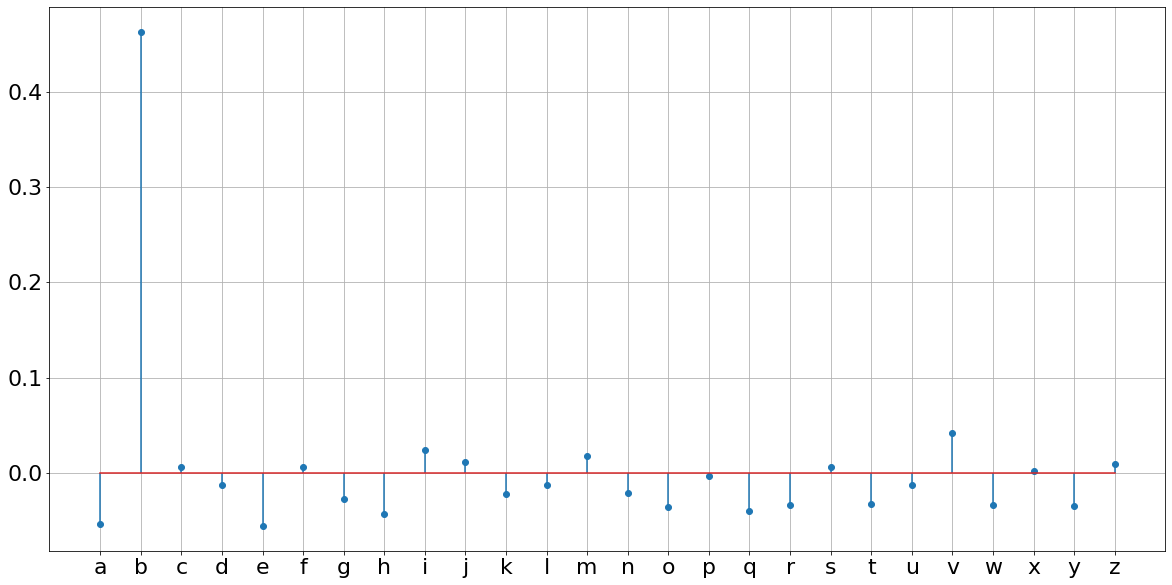

Cosine similarity between the concatenated sequence and the sequence represented from the scratch: [[1.]]


In [5]:
HDseq_bundling_shifted=MAP.rotate(HDseq_bundling,rotateby=3) # shift the sequence by permutation

#Calculate similarity between the representation of the shifted sequence at 5th position and the whole codebook.
#We expect to see similarity only to the fifth symbol in the sequence
HDsymbol5=MAP.rotate(HDseq_bundling_shifted,rotateby=-4)
similarity=MAP.similarity(itemMemory[0],HDsymbol5,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the fifth position in the shifted sequence to the codebook:")
plt.show()

# Concatenation of two sequences
exSeq2= ['x', 'y', 'z'] # the second sequence
HDseq_bundling2=DS.sequence(itemMemory, exSeq2, vsatype="MAP", rerptype="bundling", bundlingtype="unrestricted")
HDseq_bundling_concat=HDseq_bundling2 +  HDseq_bundling_shifted # concatenated sequence

#Calculate similarity between concatenated sequence and the sequence represented from the scratch
HDseq_scratch=DS.sequence(itemMemory, exSeq2 + exSeq, vsatype="MAP", rerptype="bundling", bundlingtype="unrestricted")
similarity=MAP.similarity(HDseq_bundling_concat,HDseq_scratch,stype="cosine")
print("Cosine similarity between the concatenated sequence and the sequence represented from the scratch:", similarity)


# Binding-based representation

In [6]:
exSeq=['a', 'b', 'c', 'd', 'e'] # sequence to represent
HDseq_binding=DS.sequence(itemMemory, exSeq, vsatype="MAP", rerptype="binding")

exSeq2=['a', 'b', 'c', 'd', 'd'] # very similar sequence 
HDseq_binding2=DS.sequence(itemMemory, exSeq2, vsatype="MAP", rerptype="binding")

#Calculate similarity between very similar sequences
similarity=MAP.similarity(HDseq_binding,HDseq_binding2,stype="cosine")
print("Cosine similarity to another sequence, which differs in only one position:", similarity)

#Replacing "e" to "z" at 5th position in  the  sequence
HDe=MAP.getitems(itemMemory, ["e"])
HDz=MAP.getitems(itemMemory, ["z"])
HDseq_replaced=MAP.bind( MAP.unbind(HDseq_binding,MAP.rotate(HDe[0],rotateby=4)), MAP.rotate(HDz[0],rotateby=4)) 

#Calculate similarity between replaced sequence and the sequence represented from the scratch
HDseq_scratch=DS.sequence(itemMemory, ['a', 'b', 'c', 'd', 'z'], vsatype="MAP", rerptype="binding")
similarity=MAP.similarity(HDseq_replaced,HDseq_scratch,stype="cosine")
print("Cosine similarity between replaced sequence and the sequence represented from the scratch:", similarity)

Cosine similarity to another sequence, which differs in only one position: [[-0.03]]
Cosine similarity between replaced sequence and the sequence represented from the scratch: [[1.]]


# Tuples 

In [7]:
exSet1=['a', 'b', 'c', 'd', 'e'] # 1st set to represent
exSet2=['x', 'y', 'z'] # 2nd set to represent
HDset1=DS.sethd(itemMemory, exSet1, vsatype="MAP", bundlingtype="unrestricted") # make representation
HDset2=DS.sethd(itemMemory, exSet2, vsatype="MAP", bundlingtype="unrestricted") # make representation
HDtuples=MAP.bind( HDset1 , MAP.rotate(HDset2,rotateby=1)) # composite representation of all tuples 

#Calculate cosine similarity between the representation of the tuples and some of the tuples
tuple_pres=DS.sequence(itemMemory, ['a', 'x'], vsatype="MAP", rerptype="binding")
similarity_pres=MAP.similarity(HDtuples,tuple_pres,stype="cosine")
print("Cosine similarity between the composite representation and a tuple present in the representation:", similarity_pres)

tuple_no_pres=DS.sequence(itemMemory, ['a', 'b'], vsatype="MAP", rerptype="binding")
similarity_no_pres=MAP.similarity(HDtuples,tuple_no_pres,stype="cosine")
print("Cosine similarity between the composite representation and a tuple not present in the representation:", similarity_no_pres)

Cosine similarity between the composite representation and a tuple present in the representation: [[0.25971153]]
Cosine similarity between the composite representation and a tuple not present in the representation: [[-0.01329232]]


# Graphs

# Undirected graphs

Similarity of the vertices connected to 'a' in the graph to the codebook:


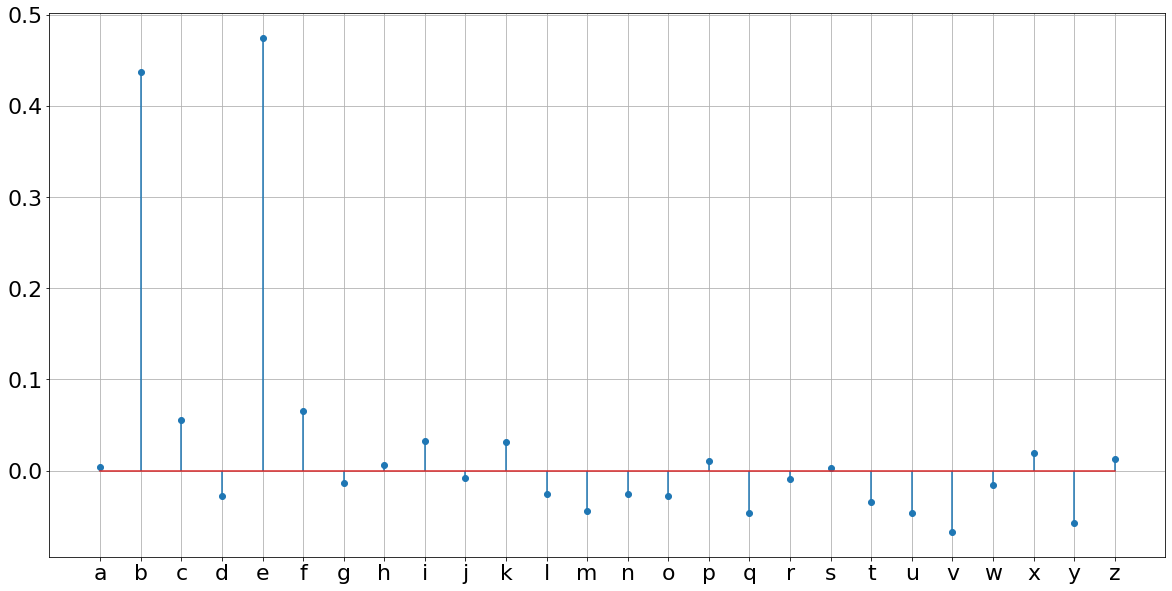

In [8]:
edges=[("a","b"),("a","e"),("c","b"),("d","c"),("e","d")] # edges of the graph to be represented

HDundir=DS.graph(itemMemory, edges, vsatype="MAP", graphtype="undirected", bundlingtype="unrestricted") # make representation

#Check verteces connected to "a"
HDa=MAP.getitems(itemMemory, ["a"])
approx_verteces=MAP.unbind(HDundir,HDa[0])

#We expect to see similarity only to "b" and "e" symbols 
similarity=MAP.similarity(itemMemory[0],approx_verteces,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the vertices connected to 'a' in the graph to the codebook:")
plt.show()

# Directed graphs

Similarity of the outgoing connections from 'a' to the codebook:


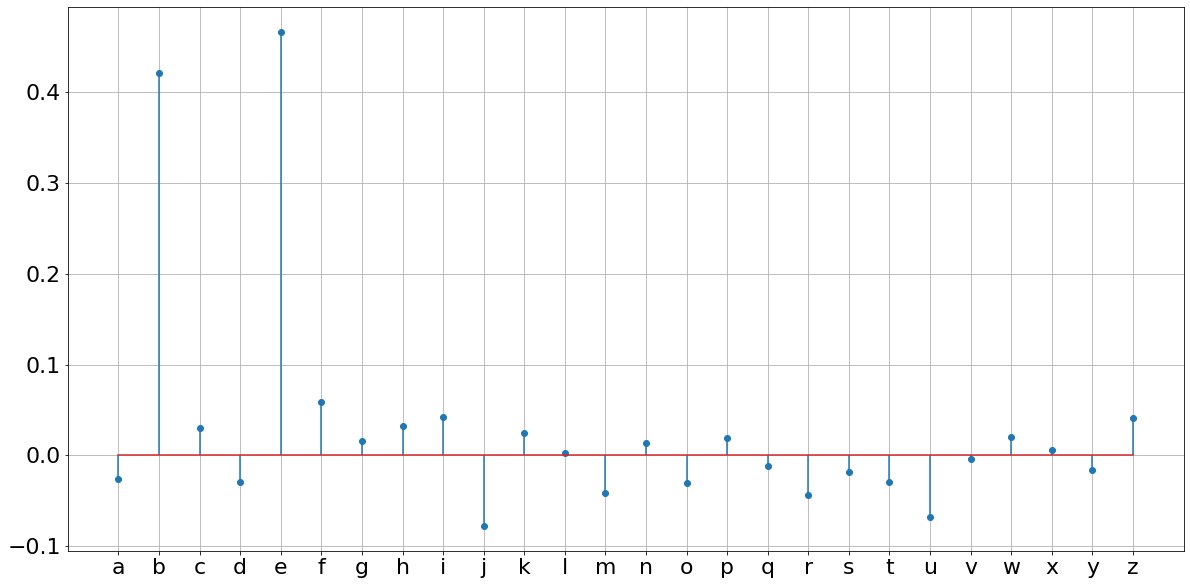

Simality of the incoming connections to 'b' to the codebook:


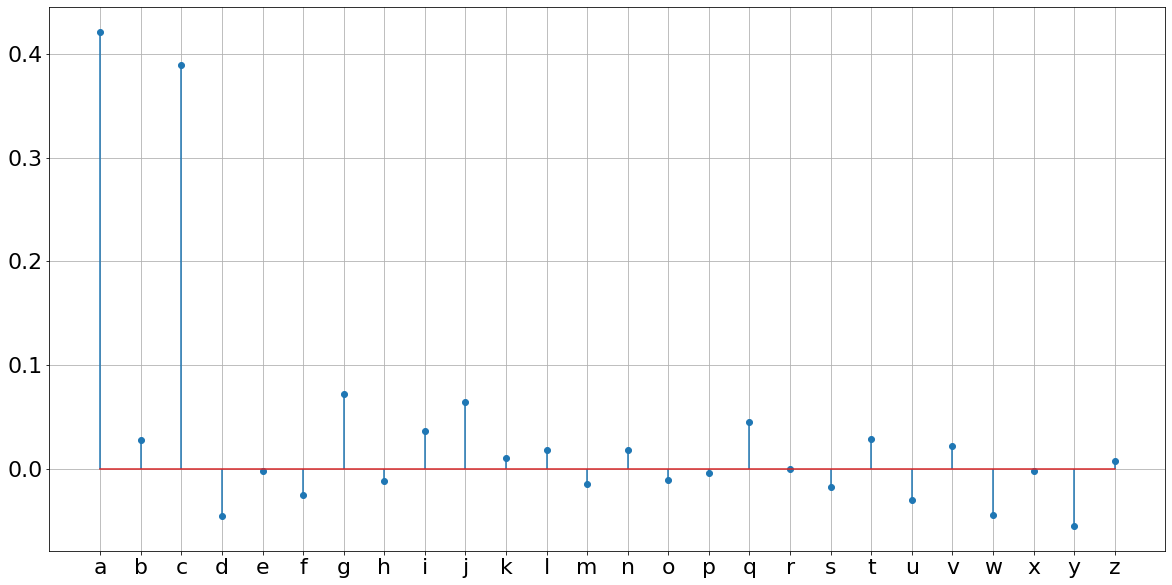

In [9]:
edges=[("a","b"),("a","e"),("c","b"),("d","c"),("e","d")] # edges of the graph to be represented

HDundir=DS.graph(itemMemory, edges, vsatype="MAP", graphtype="directed", bundlingtype="unrestricted") # make representation

#Check outgoing connections from "a"
HDa=MAP.getitems(itemMemory, ["a"])
approx_outgoing=MAP.rotate( MAP.unbind(HDundir,HDa[0]),  rotateby=-1)

#We expect to see high similarity only to "b" and "e" symbols 
similarity=MAP.similarity(itemMemory[0],approx_outgoing,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the outgoing connections from 'a' to the codebook:")
plt.show()

#Check incoming connections to "b"
HDb=MAP.getitems(itemMemory, ["b"])
approx_incoming=MAP.unbind(HDundir, MAP.rotate( HDb[0], rotateby=1) )  

#We expect to see high similarity only to "a" and "c" symbols 
similarity=MAP.similarity(itemMemory[0],approx_incoming,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Simality of the incoming connections to 'b' to the codebook:")
plt.show()


# Binary trees

Similarity of the symbol at path ['r','r','l'] to the codebook:


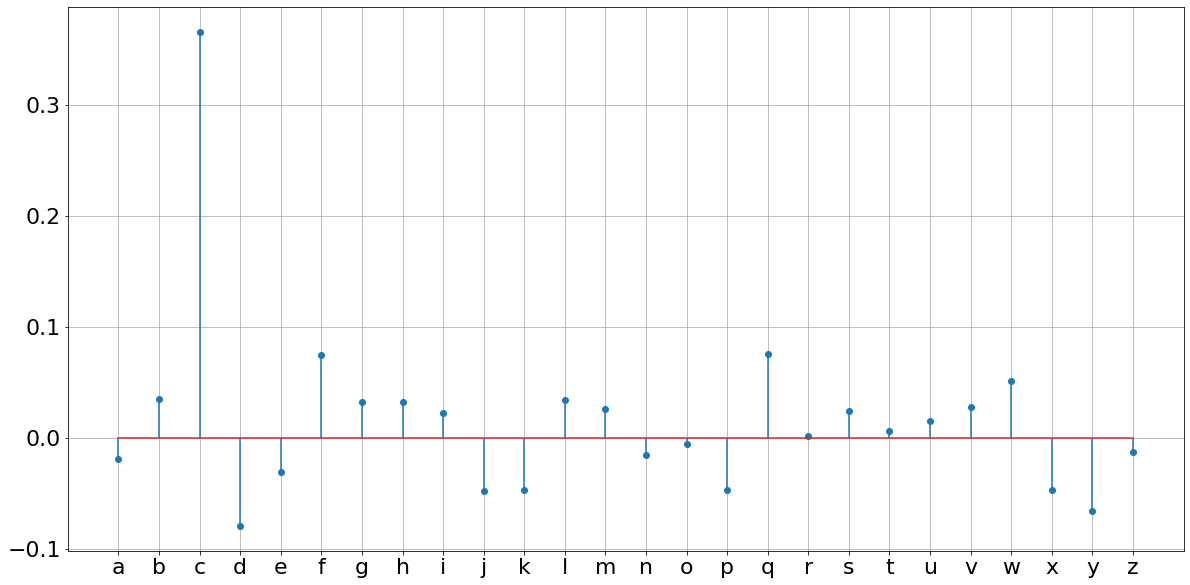

Cosine similarity to the correct path: [[0.36631526]]
Cosine similarity to the wrong path: [[0.006742]]


In [10]:
#Tree to be represented
treelist=[["a",["l","l","l"]], ["b",["l","r","l"]], ["c",["r","r","l"]], ["d",["r","r","r","l"]], ["e",["r","r","r","r"]], ["f",["l","r","r","l","l"]], ["g",["l","r","r","l","r"]]]

itemroles=MAP.item(["l","r"],  N) # Item memory for roles
 
HDtree=DS.tree(itemroles, itemMemory, treelist, vsatype="MAP", bundlingtype="unrestricted") # make representation

# Check symbol at path ["r","r","l"]
HDpath=DS.sequence(itemroles, treelist[2][1], vsatype="MAP", rerptype="binding") # HD vector for ["r","r","l"]
HDapprox=MAP.unbind(HDtree,HDpath) # Get approximate representation for the sybmol at ["r","r","l"]

#Calculate cosine similarity between the approximate representation of the set and the whole codebook
similarity=MAP.similarity(itemMemory[0],HDapprox,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Similarity of the symbol at path ['r','r','l'] to the codebook:")
plt.show()

# Check path of symbol "c"
HDc=MAP.getitems(itemMemory, ["c"]) # HD vector for "c"
HDapprox=MAP.unbind(HDtree,HDc[0]) # Get approximate representation of the path for sybmol "c"

#Calculate cosine similarity to the correct path
similarity_cor=MAP.similarity(HDpath,HDapprox,stype="cosine")
print("Cosine similarity to the correct path:", similarity_cor)

#Calculate cosine similarity to the wrong path
HDpath_wrong=DS.sequence(itemroles, treelist[0][1], vsatype="MAP", rerptype="binding") # HD vector for ["r","r","l"]
similarity_wrong=MAP.similarity(HDpath_wrong,HDapprox,stype="cosine")
print("Cosine similarity to the wrong path:", similarity_wrong)

# Frequency distributions

Simality of the representation of the frequency distribution to the codebook:


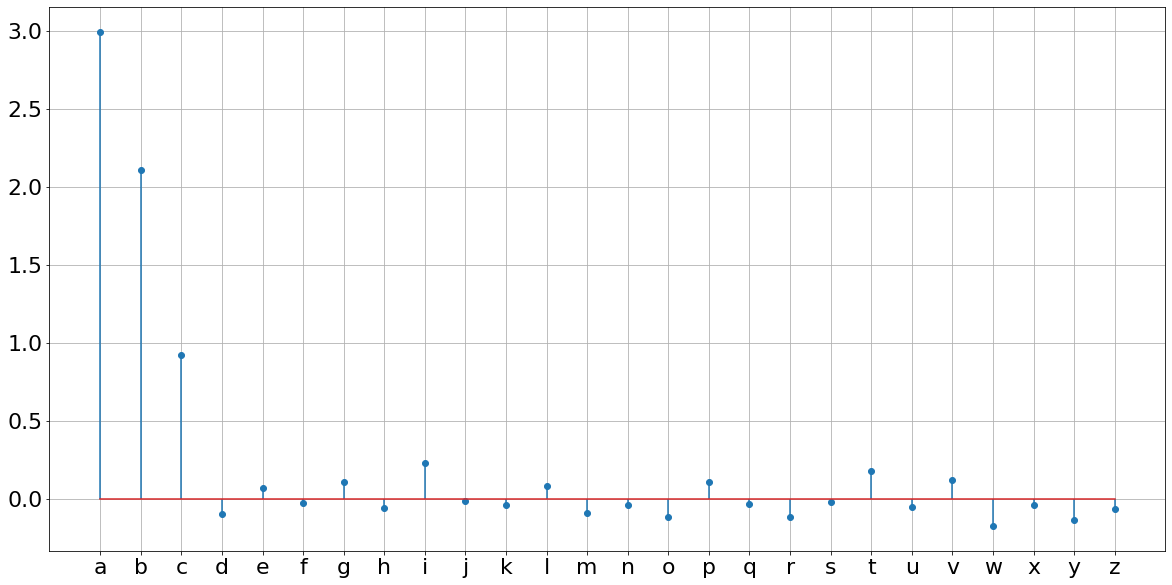

In [11]:
# distribution to represent
conc=['a', 'b', 'c'] 
frequency=[3,2,1]
HDfreq=DS.frequency(itemMemory, conc, frequency, vsatype="MAP", bundlingtype="unrestricted") # make representation

#Calculate similarity between the representation of the frequency distribution and the whole codebook
similarity=MAP.similarity(itemMemory[0],HDfreq,stype="dot")/N

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Simality of the representation of the frequency distribution to the codebook:")
plt.show()


# n-gram statistics

In [12]:
data=list("helloworld") # data to represent
n=3 # size of n-gram
HDgram=DS.ngram(itemMemory, data, n, vsatype="MAP", bundlingtype="unrestricted") # make representation
print(data)

#Calculate cosine similarity to very similar data
data2=list("felloworld") # data to represent
HDgram2=DS.ngram(itemMemory, data2, n, vsatype="MAP", bundlingtype="unrestricted") # make representation
similarity=MAP.similarity(HDgram,HDgram2,stype="cosine")
print("Cosine similarity to very similar data:", similarity)

#Calculate cosine similarity to rather different data
data2=list("hejvarlden") # data to represent
HDgram2=DS.ngram(itemMemory, data2, n, vsatype="MAP", bundlingtype="unrestricted") # make representation
similarity=MAP.similarity(HDgram,HDgram2,stype="cosine")
print("Cosine similarity to rather different data:", similarity)

#Calculate cosine similarity to n-gram present in data
HDgram2=DS.ngram(itemMemory, list("ell"), n, vsatype="MAP", bundlingtype="unrestricted") # make representation
similarity=MAP.similarity(HDgram,HDgram2,stype="cosine")
print("Cosine similarity to n-gram 'ell' present in data:", similarity)

#Calculate cosine similarity to n-gram not present in data
HDgram2=DS.ngram(itemMemory, list("abc"), n, vsatype="MAP", bundlingtype="unrestricted") # make representation
similarity=MAP.similarity(HDgram,HDgram2,stype="cosine")
print("Cosine similarity to n-gram 'abc' not present in data:", similarity)


['h', 'e', 'l', 'l', 'o', 'w', 'o', 'r', 'l', 'd']
Cosine similarity to very similar data: [[0.87439467]]
Cosine similarity to rather different data: [[0.13023584]]
Cosine similarity to n-gram 'ell' present in data: [[0.35812629]]
Cosine similarity to n-gram 'abc' not present in data: [[0.00561767]]


# Stacks

Cosine similarity between the representation of the stack and the codebook:


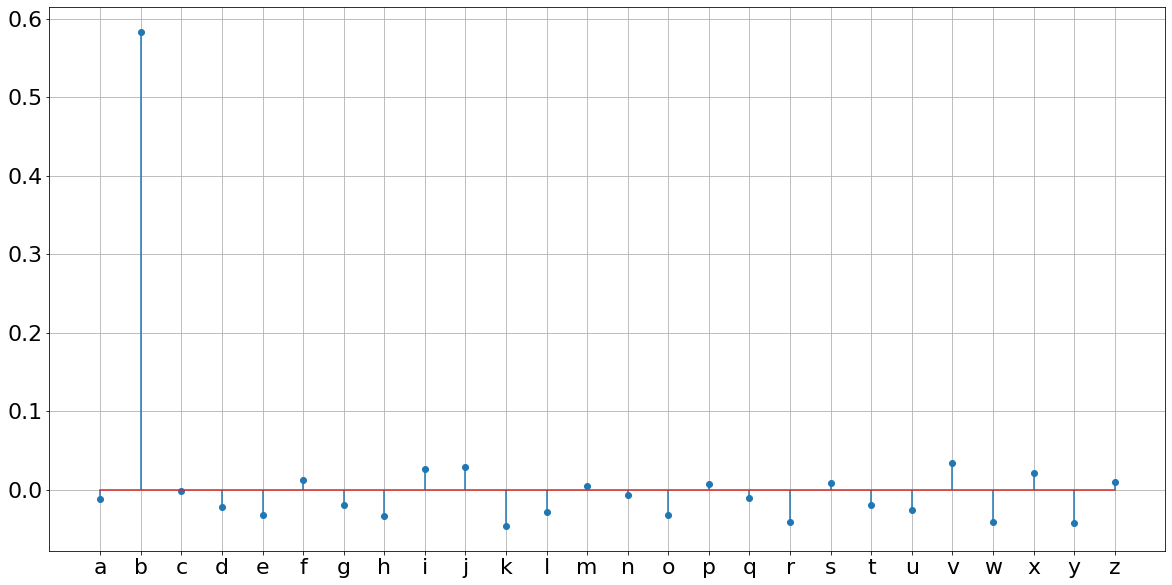

Cosine similarity between the representation of the stack and the codebook after adding 'a':


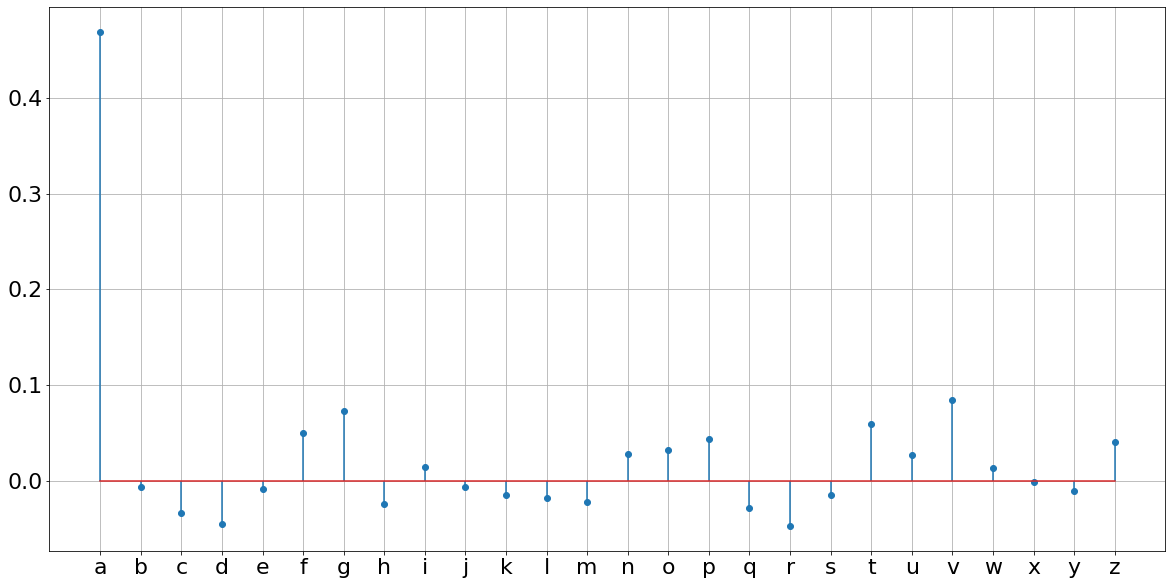

Identified symbol to pop: a
Cosine similarity between the manipulated stack and the initial one: [[1.]]


In [13]:
exStack=['b', 'c', 'd'] # current stack to represent


HDstack=DS.sequence(itemMemory, exStack, vsatype="MAP", rerptype="bundling", bundlingtype="unrestricted") # make representation

#Calculate cosine similarity between the top most symbol in the stack and the whole codebook
similarity=MAP.similarity(itemMemory[0],HDstack,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Cosine similarity between the representation of the stack and the codebook:")
plt.show()


#Add "a" to the stack
HDa=MAP.getitems(itemMemory, ["a"]) # HD vector for "c"
HDstack_w_a= HDa[0] + MAP.rotate(HDstack,rotateby=1)

#Calculate cosine similarity between the top most symbol in the stack and the whole codebook after adding 'a'
similarity=MAP.similarity(itemMemory[0],HDstack_w_a,stype="cosine")

#Plot similarity
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.stem(similarity, use_line_collection=True)
plt.xticks([i for i in range(len(concepts))], concepts)  
plt.grid()
print("Cosine similarity between the representation of the stack and the codebook after adding 'a':")
plt.show()

#Pop "a" from the stack
#Step 1: identify the topmost symbol 
HDpop=MAP.probe(itemMemory, HDstack_w_a, searchtype="nearest", simtype="dot")
print("Identified symbol to pop:", HDpop[1])

#Step 2 remove the topmost symbol 
HDstack_w_a=MAP.rotate(HDstack_w_a-HDpop[0],rotateby=-1)

#Calculate cosine similarity between the manipulated stack and the initial one
similarity=MAP.similarity(HDstack,HDstack_w_a,stype="cosine")
print("Cosine similarity between the manipulated stack and the initial one:", similarity)


# Finite State Automata

In [14]:
transitions=[["L","L","P"],["L","U","T"],["U","U","T"],["U","L","P"]] # transition of the automaton
itemmemstates=MAP.item(["L","U"],  N) # Item memory for states
itemmeminput=MAP.item(["P","T"],  N) # Item memory for input symbols

HDfsa=DS.fsa(itemmemstates, itemmeminput, transitions, vsatype="MAP", bundlingtype="unrestricted") # make representation
    
# Query automaton: Example 1
HDL=MAP.getitems(itemmemstates, ["L"]) # HD vector for state "Lock"
HDP=MAP.getitems(itemmeminput, ["P"]) # HD vector for input "Push"

#Perform query 
HDapprox= MAP.rotate( MAP.unbind(MAP.unbind(HDfsa, HDP[0]), HDL[0] )      ,rotateby=-1) # approximate representation of the next state    

#Item memory search    
HDnextState=MAP.probe(itemmemstates, HDapprox, searchtype="nearest", simtype="dot")
print("Identified next state:", HDnextState[1])    

# Query automaton: Example 2
HDT=MAP.getitems(itemmeminput, ["T"]) # HD vector for state "Lock"

#Perform query 
HDapprox= MAP.rotate( MAP.unbind(MAP.unbind(HDfsa, HDT[0]), HDL[0] )      ,rotateby=-1) # approximate representation of the next state    

#Item memory search    
HDnextState=MAP.probe(itemmemstates, HDapprox, searchtype="nearest", simtype="dot")
print("Identified next state:", HDnextState[1])    



Identified next state: L
Identified next state: U
